# Analyzing the impact of nutritional value and preparation time on the popularity of online recipes

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Names

- Allison Gomez
- Jacob Hanshaw
- Roya Savoj
- Henry Xu
- Jiabin Zou

# Abstract

Given a mutual interest in cooking, this project takes a closer look at the factors influencing the popularity of online recipes from "food.com", including nutritional value and preparation time. Sentiment analysis, multivariate regression models, and t-tests were used as part of our analysis. The conclusions found were that (1) quicker recipes (those with shorter preparation times) are slightly more popular, and (2) there is no strong evidence supporting a relationship between nutritional value and popularity. Further analysis of this question requires including other potentially more influential factors, such as the quality of instructions.

# Research Question

**How do nutritional information and/or preparation time of recipes influence recipe popularity (average ratings) and user opinions (sentiment of reviews)?**

-Specifically, does any individual nutritional components (i.e., sugar, sodium, fat, etc.) has the most influence?


## Background and Prior Work

- According to Evaluating the Nutritional Properties of Food: A Scoping Review there have been multiple studies that support the majority of chronic disease is caused by the insufficient intake of essential nutrients or dietary deficiencies. <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)Proper nutrition is essential for proper health and wellness. There have been plenty of studies that evaluate the nutritional value of food groups. Some of these metrics include the DIAAS, the digestible indispensable amino acids, CNF, calories-for-nutrient.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) The RDA is the amount of an essential nutrient that the Health and Food Board Deems necessary to fulfill the needs of a healthy person.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This metric is on every container and is used by consumers to ensure that they are meeting their nutrition standards. Currently the FDA reports the Daily Values of Fats, Proteins and Carbohydrates as 78g, 50g, 275g respectively which correlated to ~700, ~200, and ~1100 calories per day.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3)
- The nutritional composition of food may vary wildly depending on the ingredients used. For instance deserts may contain more sugar and carbohydrates than a typical meal. This may affect how much consumers enjoy these recipes. Additionally it is possible that consumers may look to recipes to meet certain dietary and nutritional goals. Therefore it is important to look at how nutritional composition affects consumer satisfaction. Additionally we want to consider whether nutritional satisfaction is the only variable that affects consumer satisfaction. For instance Consumers may be more satisfied if recipes are easier to prepare.



 
1. <a name="cite_note-1"></a> [^](#cite_ref-1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9182956/
2. <a name="cite_note-2"></a> [^](#cite_ref-2) https://www.ncbi.nlm.nih.gov/books/NBK234926/
2. <a name="cite_note-3"></a> [^](#cite_ref-3) https://www.fda.gov/food/nutrition-facts-label/daily-value-nutrition-and-supplement-facts-labels


# Hypothesis


A recipe's popularity and user sentiment will be influenced by a combination of factors, including:

**Nutritional Content**: A balanced diet consisting of a recommended composition of nutritions, such as fat, carbohydrate, protein, and so on, might be rated higher. But popularity may also depend on specific dietary trends.
    
**Preparation Time**: Quicker recipes might be more popular.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Food.com Recipe & Review Data
  - Link to the dataset: https://cseweb.ucsd.edu/~jmcauley/datasets.html#foodcom
  - Number of observations: 
    - 231,637 Recipes
    - 1,132,367 Reviews
  - Number of variables: 
    - 12 Variables for Recipes
      - 5 of them are of data type Int64: id, minutes, contributor_id, n_steps, n_ingredients
      - 7 of them are of data type Object: name, submitted, tags, nutrition, steps, description, ingredients
    - 5 Variables for Reviews
      - 3 of them are of data type Int64: user_id, recipe_id, rating
      - 2 of them are of data type Object: date, review
      
The dataset we choose takes popular recipes and review data from the online recipe page called Food.com. It has a large amount of data for both. The recipe data includes the name, time to make, ingredients, and nutritional content among other things. The review data contains the recipe id to connect to the recipe, date, rating, and review.

## Food.com Recipe & Review Data Cleaning

**Importing** 
- In the first two cells we are importing pandas and ast to help with cleaning the data and importing the data sets we will be cleaning. There are two data sets one that includes the ingredients caloric information and one that includes the reviews for a given recipe. We also take a look at the data types of each column.


In [ ]:
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy
from scipy import stats

In [51]:
recipes=pd.read_csv('RAW_recipes.csv')
interactions=pd.read_csv('RAW_interactions.csv')
display(recipes.head(3))
display(interactions.head(3))
display(recipes.dtypes)
display(interactions.dtypes)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object

**Filtering data**
- In the next cell we are selecting the top ten thousand recipes with most reviews to use for analysis using the recipe id.

In [52]:
# select recipes with plenty reviews so that the average rating is more reliable
top_10k_recipes=interactions.groupby('recipe_id').size().sort_values(ascending=False).index[:10000]
recipes=recipes[recipes['id'].isin(top_10k_recipes)]

**Dropping NAs**
- When looking at the rows with and without NA values using describe(), there are no significant differences their mean and minimum values. However, the rows with NA values have significantly large maximum values. Some outliers are improbably high, such as a calories value up to more than 2800 for one course. This render a high standard deviation and can bias our analysis.

- In the next cell we droped rows where there are Null values.

In [53]:
interactions=interactions.dropna()
recipes=recipes.dropna()

**Flattening**
- In the next two cells we are transforming the string of nutritional data in the nutrition column of the data frame into the new columns 'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'.


In [54]:
# value stored in nutrition looks like list but they are actually str, convert them back to list
recipes['nutrition'] = recipes['nutrition'].apply(ast.literal_eval)

In [55]:
# flatten the nutrition column so that it's easier to work with
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrate']
recipes[nutrition_columns] = pd.DataFrame(recipes['nutrition'].tolist(), index=recipes.index)
recipes.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate
15,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,105.7,8.0,0.0,26.0,5.0,4.0,3.0
16,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,94.0,10.0,0.0,11.0,11.0,21.0,0.0
36,how i got my family to eat spinach spinach ca...,25775,50,37305,2002-04-22,"['60-minutes-or-less', 'time-to-make', 'course...","[166.1, 16.0, 6.0, 32.0, 19.0, 26.0, 3.0]",5,"['preheat oven to 350 degrees', 'place spinach...","if spinach scares you, this is one recipe that...","['frozen chopped spinach', 'egg', 'salt', 'bla...",8,166.1,16.0,6.0,32.0,19.0,26.0,3.0


**Filtering columns**
- In the next cell we drop all columns that are not useful for analysis("contributor_id", "tags", "steps","nutrition", "ingredients","submitted").

In [56]:
# drop extra columns
columns_to_drop = ["contributor_id", "tags", "steps","nutrition", "ingredients","submitted","description"]
recipes.drop(columns=columns_to_drop, inplace=True)
recipes.head(3)

,name,id,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate
15,chicken lickin good pork chops,63986,500,5,7,105.7,8.0,0.0,26.0,5.0,4.0,3.0
16,chile rellenos,43026,45,9,5,94.0,10.0,0.0,11.0,11.0,21.0,0.0
36,how i got my family to eat spinach spinach ca...,25775,50,5,8,166.1,16.0,6.0,32.0,19.0,26.0,3.0


**Grouping**
- In the next cell we grouped the ratings from 'interactions' by ids to calculate a 'mean rating' column and added it to 'receipes'.

In [57]:
# didn't keep texts, could add sentiment analysis before this step
avg_rating=interactions.groupby("recipe_id")['rating'].mean()
recipes=recipes.merge(how='left',right=avg_rating,left_on='id',right_on='recipe_id')
recipes.head(1)

,name,id,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate,rating
0,chicken lickin good pork chops,63986,500,5,7,105.7,8.0,0.0,26.0,5.0,4.0,3.0,4.368421


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - Descriptive Analysis

To fully understand our data, we would first describe the basic features of the quantitative variables. Then, we would plot graphs to look at the distribution of each important column, specifically the nutritional value and components. We would also look at the trend of cooking time of recipes as we predicted it may influence people's review.

In [58]:
#check the averages for each column to understand the data overall
recipes.describe()

,id,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate,rating
count,9768.000000,9.768000e+03,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000
mean,124502.121519,2.199634e+05,9.477989,8.793100,456.857279,33.926290,77.545147,34.406736,35.826372,43.433661,14.979115,4.437286
std,105686.065778,2.172836e+07,5.745813,3.654009,791.672845,75.441367,230.648668,132.465735,83.058711,96.487576,30.461257,0.385411
min,49.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.263158
25%,44050.250000,2.100000e+01,6.000000,6.000000,174.675000,8.000000,8.000000,7.000000,7.000000,7.000000,4.000000,4.264706
50%,95606.500000,4.000000e+01,8.000000,8.000000,307.500000,20.000000,22.000000,17.000000,18.000000,23.000000,9.000000,4.515152
75%,172770.500000,7.000000e+01,12.000000,11.000000,505.250000,39.000000,66.000000,36.000000,52.000000,51.000000,16.000000,4.700000
max,533699.000000,2.147484e+09,82.000000,43.000000,38680.100000,4317.000000,8320.000000,7084.000000,6540.000000,4960.000000,1188.000000,5.000000


**Overall Description**:
- **Time**: We use the median to represent the typical time a recipe would take, which is about 40 minutes. The mean cooking time is too far off to be considered realistic (219,963.4 minutes = 152.75233 days). On a closer look, we would say it is skewed by the outlier(s) whose maximum value is 2.147484e+09 minutes (4000+ years), when the 75th percentile is only 70 minutes.

- **Ingredients and Steps**: On average, a recipe takes about 9 ingredients with 8 steps.

- **Calories**: On average, one recipe's meal seems to contain about 457 calories, which seems reasonable at first glance. However, considering this column also has an extremely high maximum value, the median, again, may be a better representation of typical values, which is around 308 calories. It is a rather low average calories value, potentially conforming to our guess that people tend to choose healthier recipes.


### Outliers
- It seems like there are unreasonable outliers in our dataset, explore what they are and clean it up before moving forward

In [59]:
# outliers in minutes column
display(recipes[recipes['minutes']>60*24*7].head(3))
# outliers in calories column
display(recipes[recipes['calories']>3000].head(3))

,name,id,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate,rating
2499,corned beef brisket from scratch,115220,10320,8,12,985.1,68.0,34.0,806.0,251.0,78.0,3.0,3.781250
2582,cranberry liqueur,103136,17300,12,4,4846.1,0.0,3270.0,0.0,3.0,0.0,285.0,4.588235
3145,dill pickles,13070,10090,8,7,10.8,0.0,5.0,14.0,0.0,0.0,0.0,3.869565


,name,id,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate,rating
9,symphony brownies,44895,45,10,5,5728.3,470.0,1941.0,87.0,140.0,443.0,226.0,4.000000
11,the best chocolate chip cheesecake ever,62368,90,12,10,6007.2,653.0,1772.0,149.0,228.0,1218.0,155.0,4.476190
106,4th of july trifle,10889,60,11,10,6521.6,456.0,2714.0,200.0,163.0,852.0,301.0,4.617647


After looking up these dishes on the original website, it seems that most dishes with long preparation times, which initially appear to be errors, are actually dishes that require time to sit, such as those involving fermentation or dry aging. Therefore, we only remove the values that are too extreme and are due to data entry errors. And we take log transformation of time to reduce the impact of outliers

For dishes with unusually high nutritional values, we found that they are due to unreasonable serving sizes (5000g, for example). These entries are removed so that our model will be less affected by outliers.

In [60]:
# remove extreme outliers,
# setting upper bound as 3 standard deviations away from the median for nutrition values 
# and 30 days for preparation time
recipes = recipes[(recipes['minutes'] < 43200) & (recipes['calories'] < 2683)
            &(recipes['total_fat'] < 246)&(recipes['protein'] < 267)
            &(recipes['sugar'] < 712)&(recipes['sodium'] < 413)
            &(recipes['saturated_fat'] < 312)&(recipes['carbohydrate'] < 99)
            &(recipes['minutes'] > 0)&(recipes['calories'] > 0)]
recipes['preparation_time_log'] = np.log(recipes['minutes'])

### Nutrition Values
For individual nutritional components, we will elaborate in the following section along with graphs to offer more detailed analysis.

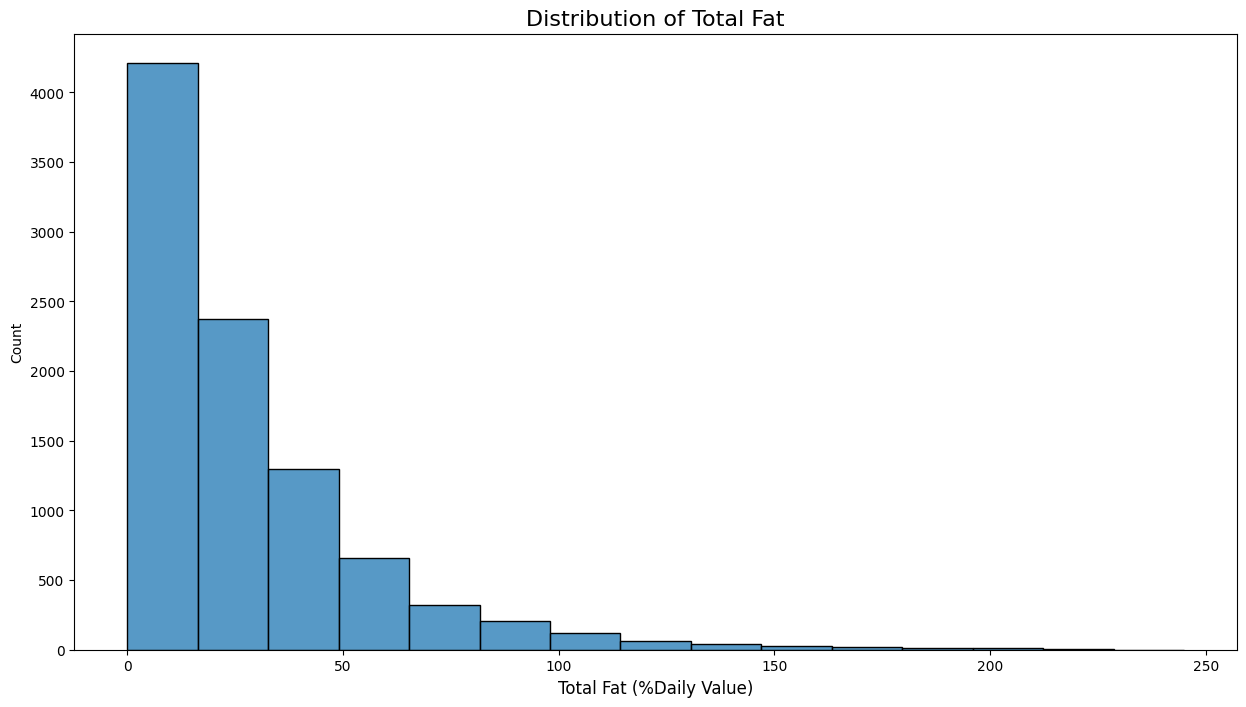

In [61]:
#look at overall total_fat as a plot
plt.figure(figsize=(15, 8))
nutrition_plot_cal = sns.histplot(data=recipes, x='total_fat', bins=15)
nutrition_plot_cal.set_title("Distribution of Total Fat", fontsize=16)
nutrition_plot_cal.set_xlabel("Total Fat (%Daily Value)", fontsize=12)
plt.show()

As we can see, the value of Total fat still has a skewed distribution after removing outliers, but it's less extreme and meets our expectation.

We made a similar histogram for each of the other nutritions below:

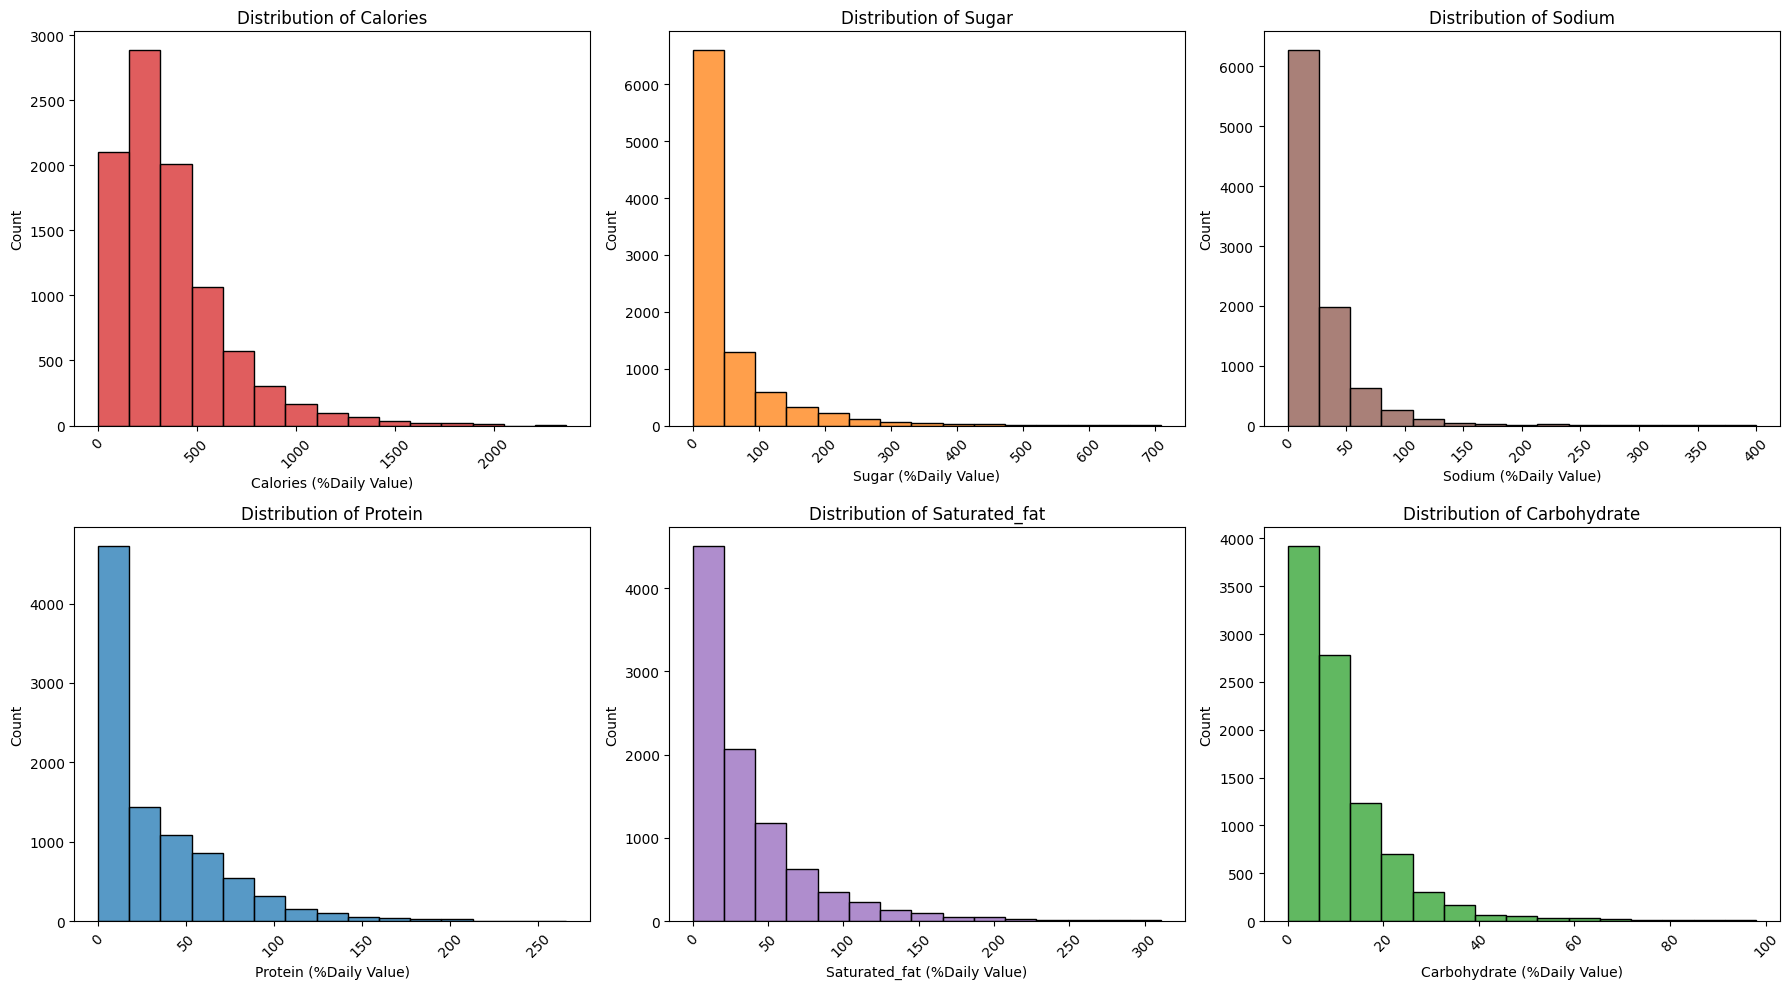

In [62]:
plt.figure(figsize=(18, 10))

nutritions = ['calories', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrate']
colors = ['#d62728', '#ff7f0e', '#8c564b', '#1f77b4', '#9467bd', '#2ca02c']

for i, (nutrition, color) in enumerate(zip(nutritions, colors), 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=recipes, x=nutrition, bins=15, color=color)
    plt.title(f"Distribution of {nutrition.capitalize()}", fontsize=12)
    plt.xlabel(f"{nutrition.capitalize()} (%Daily Value)", fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

As we can see, again, each component has a clear right skew where the majority of our points are clustered near zero.

### Average ratings
- We also want to check the distribution of average rating, which is our y variable

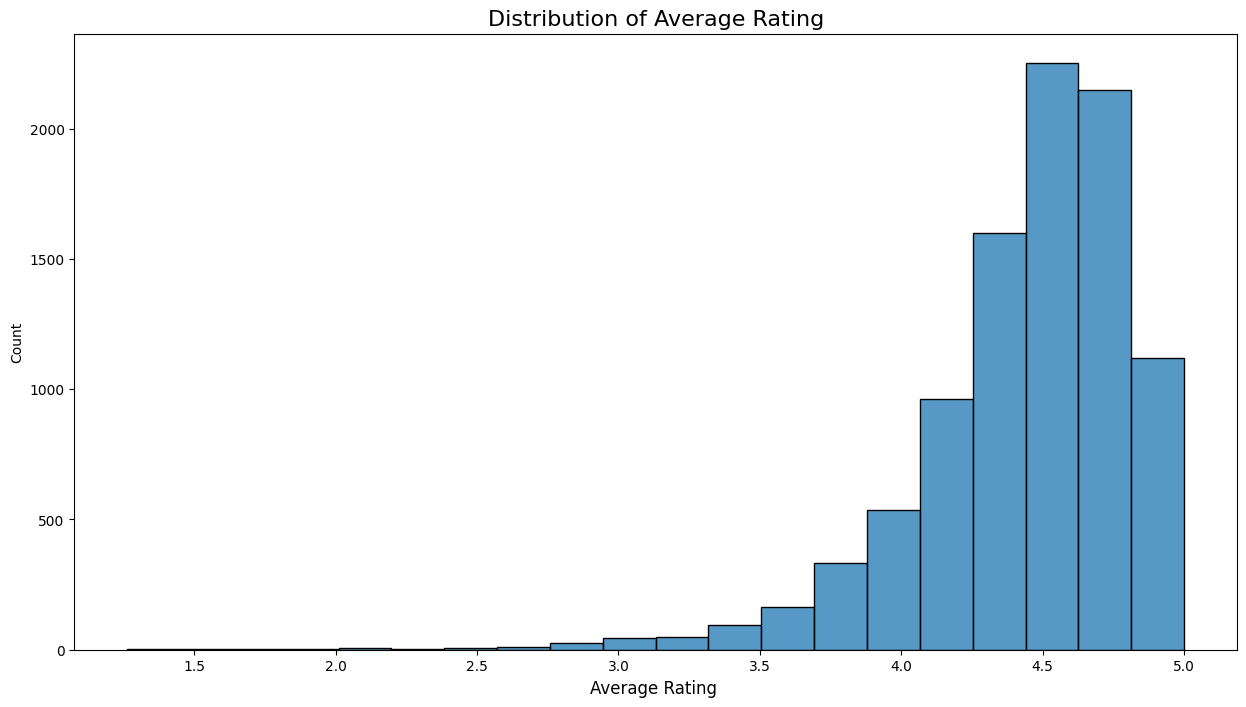

In [63]:
#look at overall average_rating as a plot
plt.figure(figsize=(15, 8))
nutrition_plot_cal = sns.histplot(data=recipes, x='rating', bins=20)
nutrition_plot_cal.set_title("Distribution of Average Rating", fontsize=16)
nutrition_plot_cal.set_xlabel("Average Rating ", fontsize=12)
plt.show()

It appears that unlike nutritions, our rating has a clear left skewed pattern where the majority of data clustered around 4 to 5.

### Section 2 of EDA - Bivariate and multivariate analysis
- To further explore the relationship between features and to find what feature are useful for predicting recipe ratings, we used scatter pairplot and correlation matrix to check how are nutrition values, preparation time and ratings are related.


#### Cooking Time Data Review
- We mentioned in our hypothesis that the time to cook a recipe might affect the rating, so we will start by looking at the plot of cooking times.

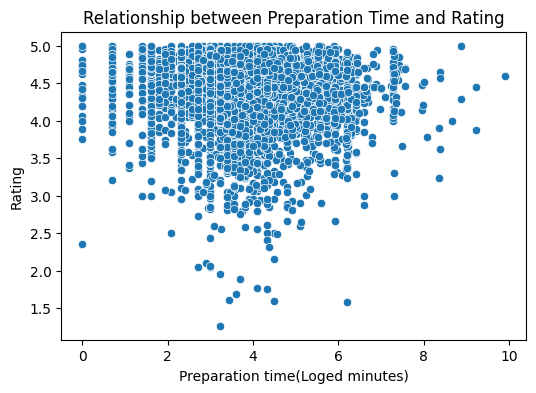

In [64]:
plt.figure(figsize=(6, 4))  # Adjust the figure size here
time_plot = sns.scatterplot(data=recipes, x='preparation_time_log', y='rating')
plt.title("Relationship between Preparation Time and Rating")
plt.xlabel("Preparation time(Loged minutes)")
plt.ylabel("Rating")
plt.show()

From the plot, it is not apparent whether there is a relationship or what relationship is between 'preparation_time_log' and 'rating'.

We plotted similar pairplots to see the relationship between each pair of variables. To keep the resulting matrix readable and to ensure that each subplot is not too small, we only included the three most representative types of nutrition: 'calories', 'total_fat', and 'protein'.

<Figure size 1000x800 with 0 Axes>

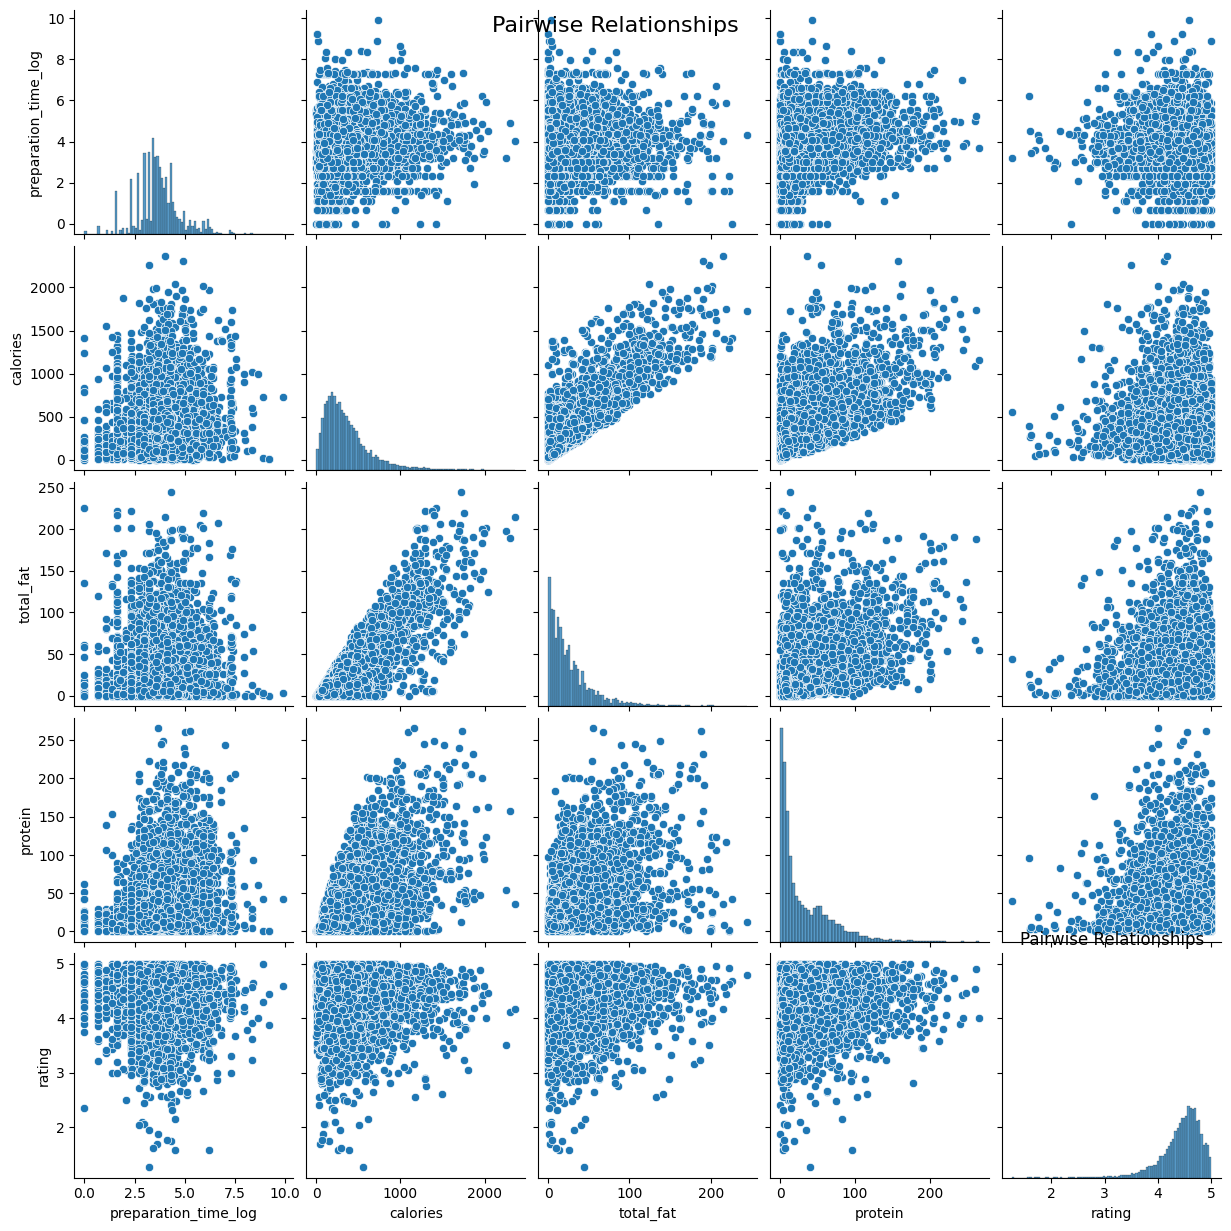

In [91]:
features = ['preparation_time_log', 'calories', 'total_fat','protein', 'rating']

# Bivariate EDA
plt.figure(figsize=(10, 8))
pairplot=sns.pairplot(recipes[features])
plt.title("Pairwise Relationships")
pairplot.suptitle("Pairwise Relationships", fontsize=16)
plt.show()

As the result shows, the three nutrition features exhibit similar pattern when paired with rating, rating seems to increase as nutrition value increase. Where as the pattern between preparation time vs rating are different, rating seems to decrease then increase as preparation time increases.

There is also an apparant positive correlation between nutrition values, which meets our expectation that there is probably a confounding variable which is serving_size.

To more clearly see and quantify the correlation, we also made a correlation matrix for the same features below:

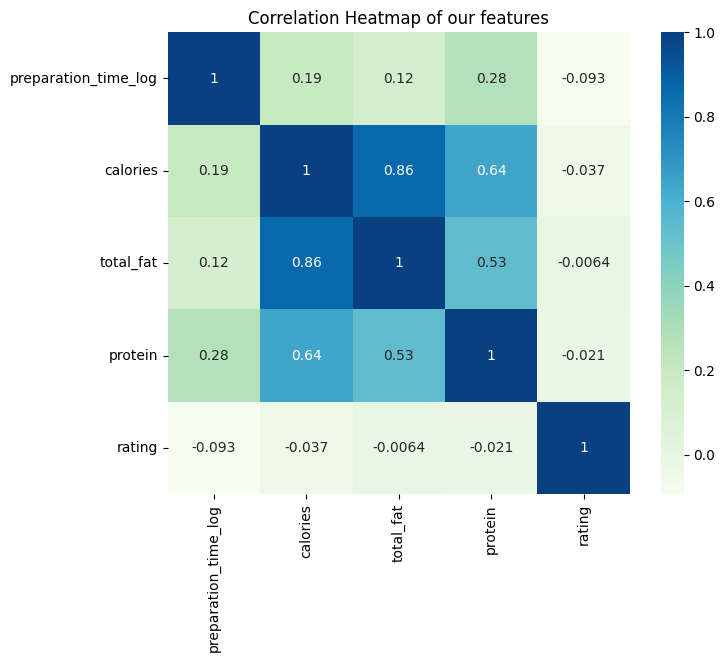

In [66]:
# Correlation Heatmap
features = ['preparation_time_log', 'calories', 'total_fat', 'protein', 'rating']

plt.figure(figsize=(8, 6))
corr = recipes[features].corr()
sns.heatmap(corr, annot=True, cmap='GnBu', square=True)
plt.title('Correlation Heatmap of our features')
plt.show()

As the correlation coefficients show, unlike what the scatter plots suggested, there is actually no or a very weak negative correlation between nutrition values and ratings. Our initial impression from the scatter plots was inaccurate, probably due to the fact that the distribution of rating is left-skewed and the distribution of nutrition are right-skewed, and that hundreds of points are overlapping with each other, making it hard to discern the true correlation. On the other hand, there is a slightly stronger negative correlation between log_minutes and rating, suggesting that quicker recipes might be more popular, which agrees with our hypothesis.

**Normalize Nutritions:** 
- In the heatmap above we have found that there is a major confounding variable 'serving size', we will normalize the each nutrition value to indicate the amount of daily value one can get from that recipe if one's daily diet compose of 2000 calories of such dishes.

In [67]:
nutritions = ['total_fat','sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrate']

for nutrient in nutritions:
    recipes[f'{nutrient}_norm'] = (recipes[nutrient] / recipes['calories']) * 2000
recipes.head(3)

,name,id,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate,rating,preparation_time_log,total_fat_norm,sugar_norm,sodium_norm,protein_norm,saturated_fat_norm,carbohydrate_norm
0,chicken lickin good pork chops,63986,500,5,7,105.7,8.0,0.0,26.0,5.0,4.0,3.0,4.368421,6.214608,151.371807,0.000000,491.958373,94.607379,75.685904,56.764428
1,chile rellenos,43026,45,9,5,94.0,10.0,0.0,11.0,11.0,21.0,0.0,4.045455,3.806662,212.765957,0.000000,234.042553,234.042553,446.808511,0.000000
2,how i got my family to eat spinach spinach ca...,25775,50,5,8,166.1,16.0,6.0,32.0,19.0,26.0,3.0,4.150442,3.912023,192.655027,72.245635,385.310054,228.777845,313.064419,36.122818


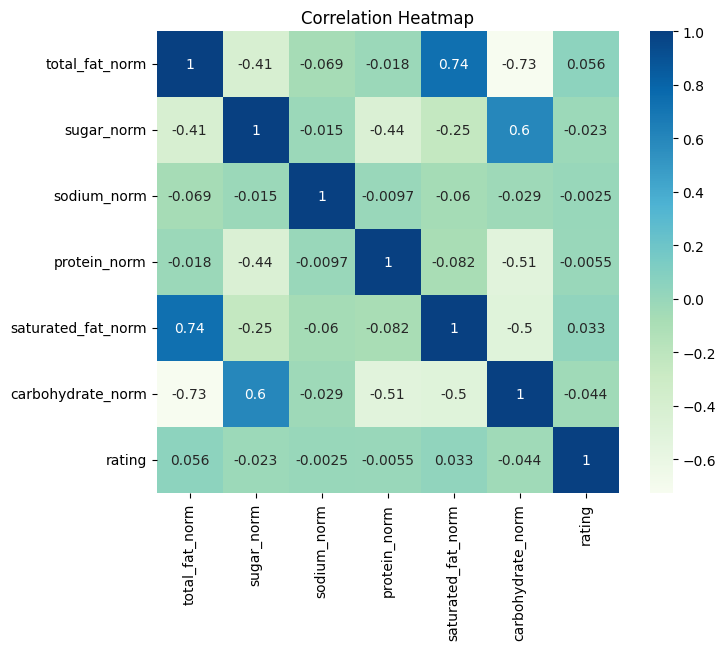

In [68]:
# Bivariate EDA for normalized nutrition columns
normalized_features = ['total_fat_norm','sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm', 'carbohydrate_norm','rating']

plt.figure(figsize=(8, 6))
corr = recipes[normalized_features].corr()
sns.heatmap(corr, annot=True, cmap='GnBu', square=True)
plt.title('Correlation Heatmap')
plt.show()

As the correlation coefficients show for normalized nutrition values, it is no longer the case that there is a strong positive correlation between all pairs of nutrients, indicating that we effectively removed the impact of the confounding variable "serving_size." However, there is still a strong positive correlation between saturated fat and total fat, as well as between sugar and carbohydrates, both of which make intuitive sense.These correlations persist even after normalizing the nutrition values because they are inherent relationships between the specific nutrients.

#### Multivariate Regression Model

Although the correlation coefficients suggested a very weak correlation between our features and ratings, we decided to train a Multivariate Regression model to prove whether nutrition values and preparation_time are significant in predicting rating of recipes.

In [69]:
# Prepare the independent variables (X) and dependent variable (Y)
X = recipes[['total_fat_norm','sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm', 'carbohydrate_norm', 'preparation_time_log']]
y = recipes['rating']

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the independent variables in the training set
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     14.07
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           2.95e-18
Time:                        20:54:17   Log-Likelihood:                -3357.7
No. Observations:                7488   AIC:                             6731.
Df Residuals:                    7480   BIC:                             6787.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5382 

The results of Multivariate Regression agree with our findings in the multivariate analysis, indicating that most of the nutrition values are not statistically significant when it comes to predicting ratings at a 0.05 significance level. However, we did find that rating is negatively associated with preparation_time and positively associated with total_fat. The negative association between rating and preparation_time agrees with our hypothesis that quicker recipes might be more popular. On the other hand, the positive association between rating and total_fat disagrees with our hypothesis, since a dish that's high in fat is usually considered unhealthy, and yet it's positively associated with rating (although very slightly).

## Vader Model 

- With the insignificant results we got from previous model, we wonder maybe discrete rating from 1 to 5 does not precisely reflect user's opinion about an recipe. For example, a review with phrases like "super amazing!", "100% will make this again!" should be considered more positive opinion than a regular 5-star rating. Therefore, we used VADER model to include sentiment analysis into our research. Using Vader will give us a more accurate assessment of the negative, positive, and compound scores behind the rating. Then, using these ratings, we will examine their relationship with the nutritional makeup of recipes and time.

**Wrangling**

- To examine the VADER results fully later, we need to wrangle the previous data frames and merge them. This process will allow the reviews and ratings to appear with the appropriate nutritional content.

- We will also need to rename some columns and drop the ones we don't need later.

In [70]:
#merge recipes and interactions together 
interactions = interactions.rename(columns={'recipe_id': 'id'})
inter_final = pd.merge(recipes, interactions, on='id')

#rename appporiate cols and drop the ones we do not need
inter_final = inter_final.rename(columns={'id': 'recipe_id'})
inter_final = inter_final.rename(columns={'rating_y': 'rating'})
cols_to_drop = ['user_id', 'date', "name", 'n_ingredients', 'n_steps', 'rating_x']
inter_final = inter_final.drop(columns=cols_to_drop)
inter_final.head(2)

,recipe_id,minutes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrate,preparation_time_log,total_fat_norm,sugar_norm,sodium_norm,protein_norm,saturated_fat_norm,carbohydrate_norm,rating,review
0,63986,500,105.7,8.0,0.0,26.0,5.0,4.0,3.0,6.214608,151.371807,0.0,491.958373,94.607379,75.685904,56.764428,5,I made this for dinner tonight and the chops w...
1,63986,500,105.7,8.0,0.0,26.0,5.0,4.0,3.0,6.214608,151.371807,0.0,491.958373,94.607379,75.685904,56.764428,5,A big hit with the meat-and-potatoes guy in th...


**Sentiment Intensity Analyze**

This code cell will create our Sentiment Intensity Analyzer. We will use this later to collect the polarity scores for each review.

In [ ]:
#importing for sentiment analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for visulaizing the runtime later
from tqdm.notebook import tqdm
#init our sia
sia = SentimentIntensityAnalyzer()

We will now extract the polarity scores using a dictionary to hold the results. The for loop will iterate throught the dataframe and find the polarity scores of each review. 
- We also used tqdm to track the progess as it goes since this is a longer operation.

In [75]:
#create a dict to hold the results
res = {}
#counter for our key value
num=0
#loop through the rows of the df to get reviews 
#also using tqdm to see the progress as a bar
for i, row in tqdm(inter_final.iterrows(), total=len(inter_final)):
    text = row['review']
    id_score = num
    res[id_score] = sia.polarity_scores(text)
    num+= 1

  0%|          | 0/439432 [00:00<?, ?it/s]

Now that we have the results, we will turn them into a data frame called df_vader. Notice the transpose method, which will transpose the data frame to the proper orientation. Then merge sentiment score with review dataframe:

In [79]:
#create new df and transpose to get proper cols and rows
df_vader = pd.DataFrame(res).T

vader_df = df_vader.merge(inter_final, left_index=True, right_index=True)
vader_df.head(2)

,neg,neu,pos,compound,recipe_id,minutes,calories,total_fat,sugar,sodium,...,carbohydrate,preparation_time_log,total_fat_norm,sugar_norm,sodium_norm,protein_norm,saturated_fat_norm,carbohydrate_norm,rating,review
0,0.056,0.821,0.123,0.7256,63986,500,105.7,8.0,0.0,26.0,...,3.0,6.214608,151.371807,0.0,491.958373,94.607379,75.685904,56.764428,5,I made this for dinner tonight and the chops w...
1,0.076,0.852,0.073,-0.0274,63986,500,105.7,8.0,0.0,26.0,...,3.0,6.214608,151.371807,0.0,491.958373,94.607379,75.685904,56.764428,5,A big hit with the meat-and-potatoes guy in th...


Now each entry contains the sentiment, nutritional makeup, and rating.

## Vader Results

- Now, we will look at our first plot after getting the results. We will use a barplot to see the compound and rating relationship. We should see higher ratings correlate with higher compound scores.

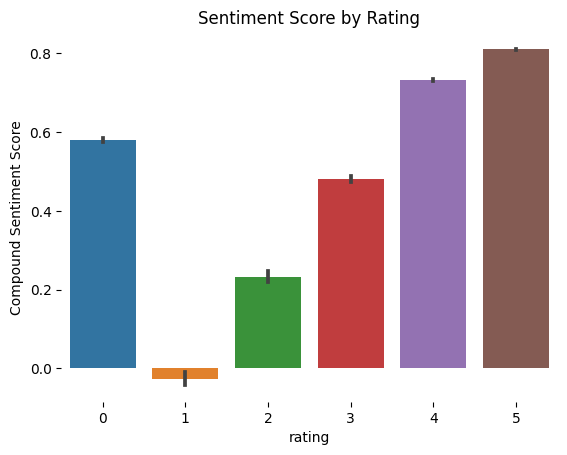

In [87]:
#create a barplot using sns 
sns.barplot(data=vader_df, x='rating', y='compound')
plt.ylabel('Compound Sentiment Score')
plt.title('Sentiment Score by Rating')
plt.box(False)

**Rating 0 Error**

- This is where we have the issue from earlier, where the graph looks correct except for the zero-rating entries. Let's take a closer look at these values.

In [84]:
rating_0 = vader_df[vader_df['rating'] == 0]
reviews_0 = rating_0['review']
reviews_0[:5]

/var/folders/qr/0ssmfy116j18_zsdyc5rbffw0000gn/T/ipykernel_95416/3317579092.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  reviews_0[:5]


15    as a young married woman i made back in 1970, ...
18    One of the best old crockpot recipes! I always...
33    I am pretty sure I know which Mexican restaura...
36    I will give these a try.  I've made them, but ...
39    I used to work at a Mexican Food Resteraunt in...
Name: review, dtype: object

After looking at some of the entries, we found that they have mixed positive and negative reviews. This shows that the zero-rating is unreliable, so we will drop the zero-rating and plot again.

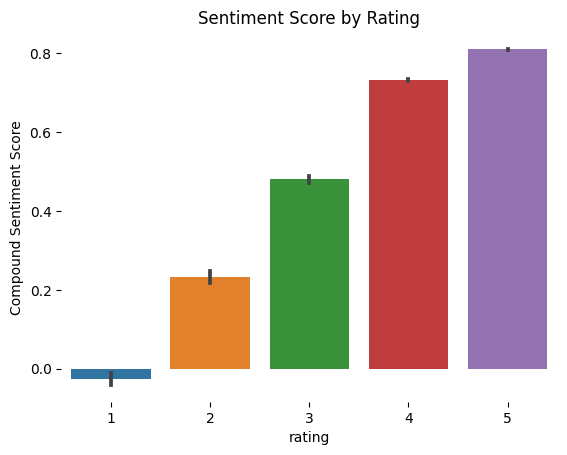

In [88]:
#drop the rating 0 entries
vader_df_t = vader_df[vader_df['rating'] > 0]

#plot the data on the same graph
sns.barplot(data=vader_df_t, x='rating', y='compound')
plt.ylabel('Compound Sentiment Score')
plt.title('Sentiment Score by Rating')
plt.box(False)

**Positive, Negative, and Compound Ratings**
- The graph above looks better now. To better understand the ratings, we will also look at the positive and negative scores with the ratings.

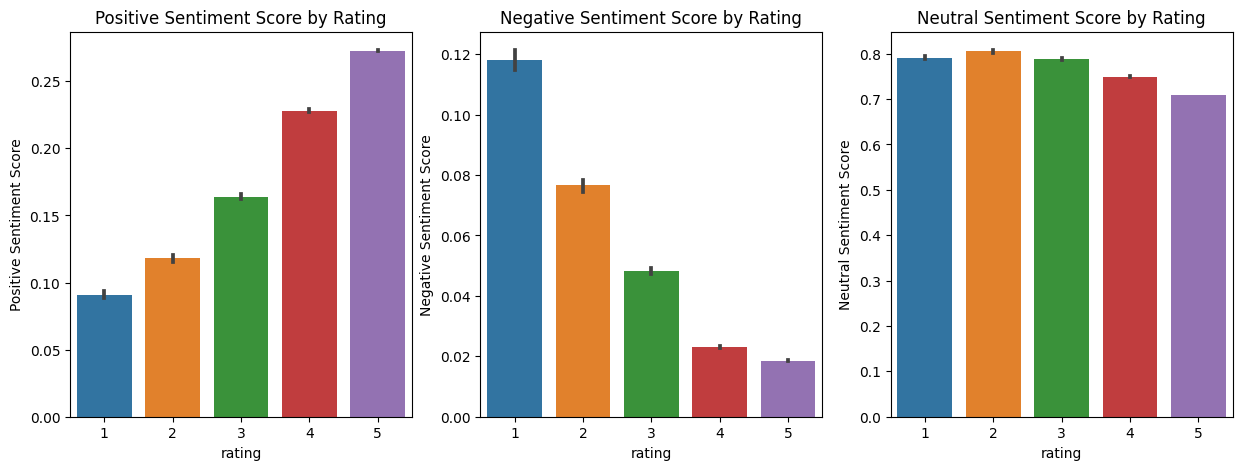

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot positive sentiment scores
sns.barplot(data=vader_df_t, x='rating', y='pos', ax=axs[0])
axs[0].set_ylabel('Positive Sentiment Score')

# Plot negative sentiment scores
sns.barplot(data=vader_df_t, x='rating', y='neg', ax=axs[1])
axs[1].set_ylabel('Negative Sentiment Score')

# Plot neutral sentiment scores
sns.barplot(data=vader_df_t, x='rating', y='neu', ax=axs[2])
axs[2].set_ylabel('Neutral Sentiment Score')

# Set titles
axs[0].set_title('Positive Sentiment Score by Rating')
axs[1].set_title('Negative Sentiment Score by Rating')
axs[2].set_title('Neutral Sentiment Score by Rating')

plt.show()

The graphs look right. The positive sentiment increases with the rating, and the negative sentiment decreases with the rating.

**Plotting with Nutritional Content**

- Now, we would like to see how the compound sentiment lines up with the nutritional makeup of its recipe. To do this, we will use multiple subplots to see any relationships.

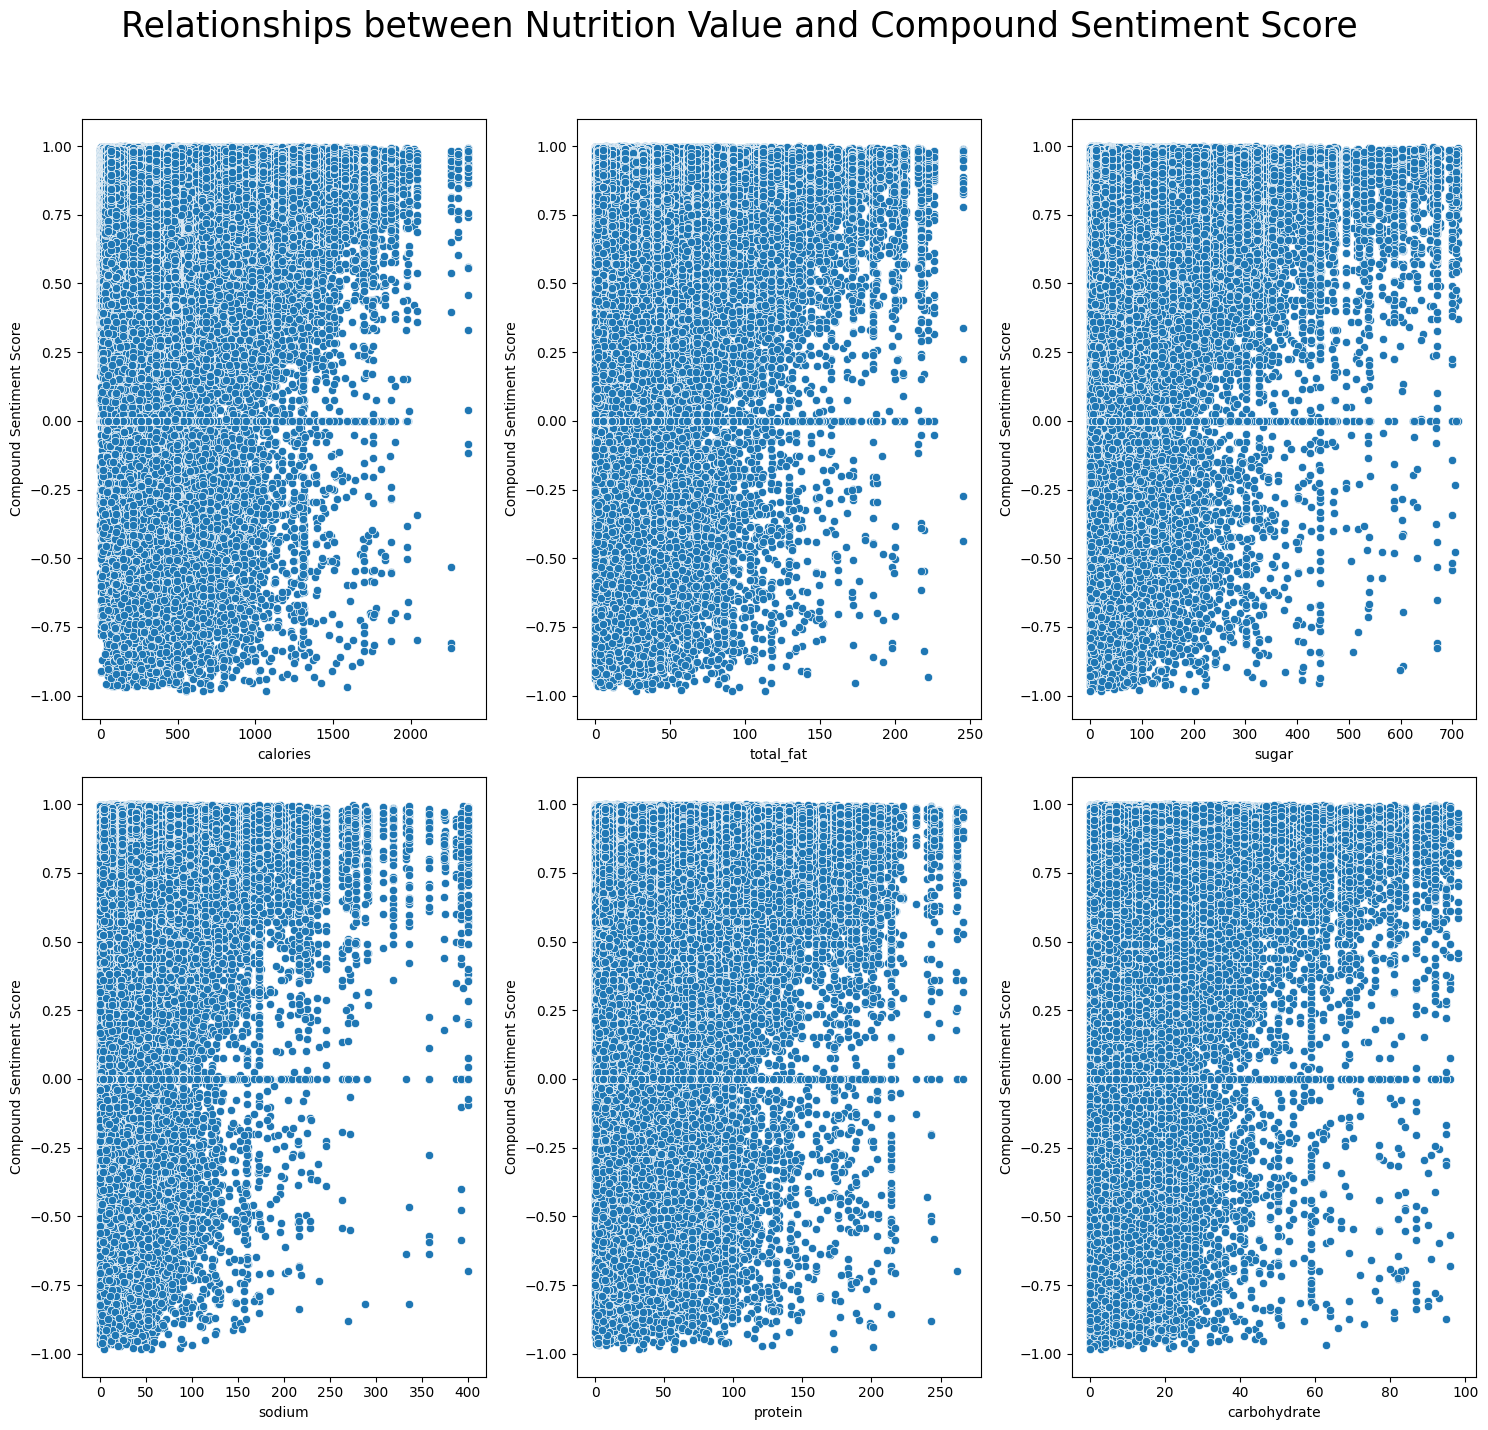

In [102]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

# Each plot covers component with the compound score
sns.scatterplot(data=vader_df_t, x='calories', y='compound', ax=axs[0, 0])
sns.scatterplot(data=vader_df_t, x='total_fat', y='compound', ax=axs[0, 1])
sns.scatterplot(data=vader_df_t, x='sugar', y='compound', ax=axs[0, 2])
sns.scatterplot(data=vader_df_t, x='sodium', y='compound', ax=axs[1, 0])
sns.scatterplot(data=vader_df_t, x='protein', y='compound', ax=axs[1, 1])
sns.scatterplot(data=vader_df_t, x='carbohydrate', y='compound', ax=axs[1, 2])

# Set y-axis label for all subplots
for ax in axs.flat:
    ax.set_ylabel('Compound Sentiment Score')

# Add a title to the figure
fig.suptitle("Relationships between Nutrition Value and Compound Sentiment Score ", fontsize=25)

plt.tight_layout(rect=[0,0.03,1,0.95])
# Display the plot
plt.show()

The plot shows that there is no apparent trend between sentiment score and nutrition values, it might seems like there is more positive sentiment score as nutrition value increase, but that's because the distribution of sentiment score is left skewed just like ratings.

**Multivariate Regression Model:**

Next, we will train a multivariate regression model similar to the previous model, but with the sentiment score as the dependent variable.

In [104]:
# Prepare the matrix so that the granularity is at the recipe level
vader_df_mean = vader_df_t.groupby('recipe_id')['compound'].mean()
comp_mean = vader_df_mean.to_numpy()

# Prepare the independent variables (X) and dependent variable (Y)
X = recipes[['total_fat_norm','sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm', 'carbohydrate_norm', 'preparation_time_log']]
#y = vader_df_t['compound']
y = comp_mean

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the independent variables in the training set
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7501
Date:                Wed, 20 Mar 2024   Prob (F-statistic):              0.629
Time:                        21:32:20   Log-Likelihood:                 8943.3
No. Observations:                7488   AIC:                        -1.787e+04
Df Residuals:                    7480   BIC:                        -1.782e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7689 

As we can see, the results are very similar to the previous model. All the variables are statistically insignificant, including 'preparation_time_log' and 'total_fat_norm' that were significant with a weak correlation. This is not surprising since sentiment score and rating heavily correlate with each other.

#### **t-test**

- We can also use a t-test to test whether health and unhealthy recipes are statistically different when it comes to the average rating they received.

In [105]:
# Healthy recipes are the ones that are rich in nutrients that tend to be lacking
# and low in nutrients that tend to be consumed in excess in modern diets.
def nutrition_check(sod, fat, prot, carb,sugar):
    if sod>200:
        return False
    if fat>200:
        return False
    if sugar>200:
        return False
    if prot<50 and carb<50:
        return False
    return True
recipes['healthy'] = recipes.apply(lambda x: nutrition_check(x['sodium_norm'], x['total_fat_norm'], x['protein_norm'], x['carbohydrate_norm'],x['sugar_norm']), axis=1)
recipes['healthy'].mean()

0.3001068376068376

Around 30% of the recipes are classified as healthy under our heuristic criteria.

Perform T test for average rating between the healthy recipes group and unhealthy recipes group:

In [106]:
healthy_ratings = recipes[recipes['healthy'] == True]['rating']
unhealthy_ratings = recipes[recipes['healthy'] == False]['rating']

# Independent Samples t-test
t_statistic, p_value = scipy.stats.ttest_ind(healthy_ratings, unhealthy_ratings)
print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Independent Samples t-test:
t-statistic: 0.6300228993851685
p-value: 0.5286949845710148


The t-test result is 0.63, which shows that there is no significant rating difference for recipes that are health and recipes that are not healthy, this finding agrees with our results in EDA as well as the Multivariate Regression model we performed.

# Ethics & Privacy

- **Research Question Asked:** Privacy is a concern when it comes to food habits in general. However, our project's datasets are anonymous in nature since they consist of online recipes sorted with rating IDs rather than identifying information. We do not know who provided the recipes, which makes it easier to keep the population of our datasets private and our level of risk low.

- **Data being Used:** For our interactions dataset, we do not have access to the username. Although there is a 'user_id' and 'date' column in the interactions dataset, which, combined with the text of the review, could potentially violate the privacy of users. To protect user privacy, we did not use these two columns in our model.

- **the Bias in Data:** Our data comes from food.com, which means it could be more representative of the population who actually use the website. However, the website is easily accessible by everyone, so no particular populations are excluded. This could be addressed in future work by including more data from various sources.

- **Bias During Analysis:** We have been proactively monitoring our research for any unintended harm. Our final models and the data processing process are very transparent. We tried our best to ensure that no bias was introduced by our analysis. The data visualizations we created target recipes and their properties, so they don't reveal private information, and they don't bias against any specific population.

# Discusison and Conclusion

**Main Conclusion:** 

We were unable to prove our hypothesis that there is a relationship between healthy recipes and consumer ratings. We did find that recipes with shorter preparation time had statistically significant higher rating.

We compared the average rating of healthy and unhealthy recipes using a t-test. In this analysis we used an alpha value of 0.05, since our p value was 0.52 which is greater than 0.05 we concluded that the difference between the average rating of a healthy recipe and the average rating of an unhealthy rating was insignificant.

We were able to prove our secondary hypothesis that recipes with shorter preparation time had a significantly higher rating. In our OLS model we found that the log(preparation_time) had a negative relationship with rating with p value 0.00. For nutrition values, most of the coefficients yielded a p value above 0.05. However the p value for the total fat comparison was 0.024 which is less than our alpha value. Therefore we can conclude that higher fat recipes typically get a slightly higher rating. 

**Limitations:**

There are a few limitations we can address regarding our analysis. To begin with, our analysis was confined to data from only one website due to our time constraints. This is important to note because it limits the generalizability of our results to other food websites and user sentiment.In addition to this, given the results we found, it is highly likely that there are other factors that are more influential on user ratings that we did not take into consideration or were unable to find data on, such as dietary trends, the quality of the instructions provided in the recipe, and the category of dish the recipe belongs to. For future research, we hope to address these limitations to better understand what factors influence recipe popularity and consumer opinions and build more powerful models.

**Impacts:**

We believe our research is important because it explores how the popularity of recipes is influenced by various factors, such as nutritional content and convenience. Our findings suggest that there is no clear relationship between nutritional value and recipe popularity, indicating that future studies might want to focus on other factors that are potentially more important. At the same time, we were able to find a correlation between higher-rated recipes and shorter prep times. Recipe websites could use that information to improve their recommendation systems and possibly raise the priority of recipes with shorter preparation times. We also found that nutrition labels with different serving sizes could be misleading and difficult to compare. It might be useful to have a universal standard for serving sizes when recipe websites or food producers create nutrition labels.







# Team Contributions

Henry: Abstract, Data cleaning, EDA code & description, Ethics & Privacy, Conclusion\
Roya: Background, part of checkpoint 1 corrections, Data cleaning description, Video Editing, Conclusion and Google Slides\
Allison: Conclusion and Google Slides\
Jacob - EDA Draft, Sentiment Analysis, Data Description\
Jiabin - Research question & Hypothesis, EDA description, part of Data wrangling